<a href="https://colab.research.google.com/github/shahzadahmad3/Natural-Language-Processing/blob/main/Deep_Learning_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Learning (DL)** is a subset of Machine Learning (ML) that focuses on using neural networks with multiple layers to automatically learn patterns from data. It is inspired by how the human brain processes information.

**👉 Key Idea:** Instead of manually designing features, deep learning models learn features automatically from raw data.

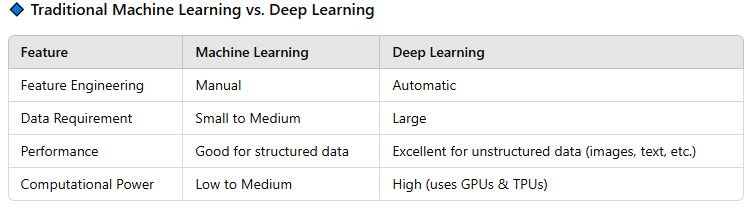

**🔹 How Deep Learning Works?**

At its core, deep learning is based on Artificial Neural Networks (ANNs), which mimic the structure of the human brain.

**1️⃣ Artificial Neural Network (ANN) Basics**

An ANN consists of neurons (also called nodes) arranged in layers.
Each neuron receives input, processes it, and passes it to the next layer.
Connections between neurons have weights that adjust during learning.

**2️⃣ Layers in a Neural Network**
A deep learning model consists of multiple layers of neurons:

**Input Layer:** Takes raw data (e.g., an image or text).

**Hidden Layers:** Process information using weights and activation functions.

**Output Layer:** Gives the final prediction.

**3️⃣ Forward Propagation**
*   Inputs pass through layers using weighted connections.
*   Activations decide neuron output.
*   The final prediction is produced.



**4️⃣ Backpropagation & Training**
*   The model calculates the error (difference between predicted & actual output).
*   Backpropagation adjusts weights using gradient descent to reduce the error.
*   This process repeats until the model learns the best parameters.

**🛠️ Mathematical Representation of a Neuron:**
Each neuron performs this computation:
y=f(WX+b)

Where:
X = Input

W = Weights

b = Bias

f = Activation Function

y = Output

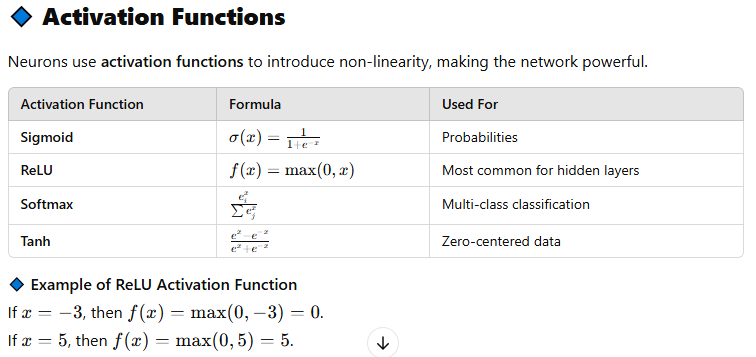

In [27]:
import numpy as np

X=np.array([0.5, 1.0, 1.5]) # Example input features
w=np.array([0.9, 0.6, 0.3]) #Weight
b=0.1 #Bias
# Compute neuron output
def relu(x):
  return max(0,x)
output=relu(np.dot(w, X)+b)
print("Neuron Output: ", output)

Neuron Output:  1.6


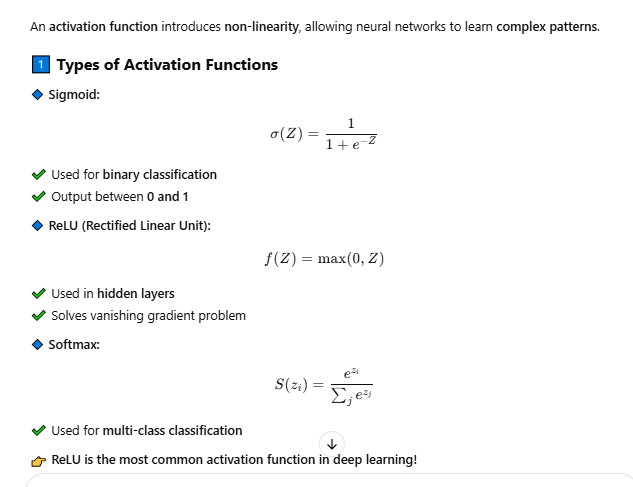

In [28]:
import numpy as np
def sigmoid(z):
  return 1/(1+np.exp(-z))

def relu(z):
  return np.maximum(0, z)

def forward_propag(x,w,b):
  z=w*x + b
  A=sigmoid(z)
  # A=relu(z)
  return A

output=forward_propag(X,w,b)
print("Predicted Output: ", output)

Predicted Output:  [0.63413559 0.66818777 0.63413559]


Now we will build a 2-layer neural network (one hidden layer) with:


*   Input Layer (2 neurons) → Two input features 𝑋1 and 𝑋2
*   Hidden Layer (3 neurons, with ReLU activation)
*   Output Layer (1 neuron, with Sigmoid activation for binary classification)

In [29]:
def initialize_parameter():
  np.random.seed(1) #For reporducibility
  W1=np.random.randn(3,2) * 0.01  # 3 neurons, 2 input features
  b1=np.zeros((3,1)) # Biases for hidden layer
  W2=np.random.randn(1,3) * 0.01 # 1 neuron, 3 hidden features
  b2=np.zeros((1,1))  # Bias for output layer
  return W1,b1,W2,b2


In [30]:
#Forward propagation computes the output from input.
def forward_propagation(X, W1, b1, W2, b2):
  Z1=np.dot(W1*X)+b1
  A1=relu(Z1)
  Z2=np.dot(W2*A1)+b2
  A2=sigmoid(Z2)
  return Z1, A1, Z2, A2

**Compute the Loss (Binary Cross-Entropy)**

For binary classification, we use the cross-entropy loss:

𝐿 = −1/𝑚 ∑[𝑦log⁡(𝐴2)+(1−𝑦)log(1−𝐴2)]

In [31]:
def compute_loss(A2, Y):
  m=Y.shape[1] #No.of Examples
  loss=-np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))/m
  return loss

In [32]:
def relu_derivative(Z):
    return (Z > 0).astype(int)

def backward_propagation(X, Y, W1, b1, W2, b2, Z1, A1, Z2, A2):
    m = X.shape[1]  # Number of examples

    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2) * relu_derivative(Z1)
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2


In [33]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return W1, b1, W2, b2


In [34]:
# Update Parameters (Gradient Descent)
# We update parameters using:
# 𝑊=𝑊−𝜂⋅𝑑𝑊
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return W1, b1, W2, b2


In [35]:
# Training the Neural Network
# We repeat forward propagation, loss computation, backpropagation, and updating weights for multiple epochs.
def train_neural_network(X, Y, learning_rate=0.01, epochs=1000):
    W1, b1, W2, b2 = initialize_parameters()

    for i in range(epochs):
        # Forward Propagation
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)

        # Compute Loss
        loss = compute_loss(A2, Y)

        # Backward Propagation
        dW1, db1, dW2, db2 = backward_propagation(X, Y, W1, b1, W2, b2, Z1, A1, Z2, A2)

        # Update Parameters
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if i % 100 == 0:
            print(f"Epoch {i}: Loss = {loss:.4f}")

    return W1, b1, W2, b2
# Now we have a fully working neural network!
